In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

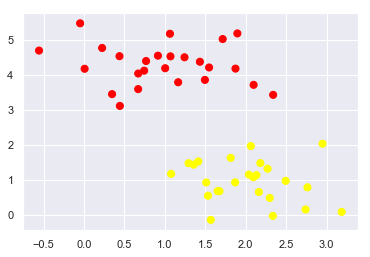

In [2]:
##随机产生数据
##cluster_std是数据的离散程度
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)##y标签为0，1的连累随机数
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

(-1, 3.5)

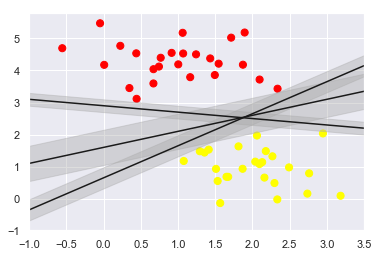

In [3]:
##先画出分割线
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
##画出边界离
for m ,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m * xfit + b
    plt.plot(xfit,yfit,'-k')
    ##边界
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
    
plt.xlim(-1,3.5)

## SVM

In [4]:
##分类任务
from sklearn.svm import SVC
##线性核函数，相当于不对数据进行变换
model=SVC(kernel='linear')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

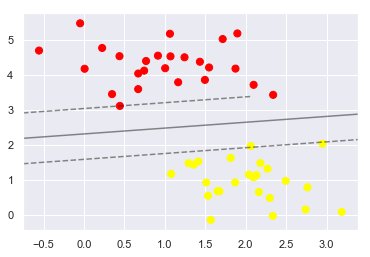

In [5]:
##绘制结果,重要
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
        xlim=ax.get_xlim()
        ylim=ax.get_ylim()
        
        ##用SVM自带的decision_function函数来绘制
        x=np.linspace(xlim[0],xlim[1],30)
        y=np.linspace(ylim[0],xlim[1],30)
        Y,X=np.meshgrid(y,x)
        xy=np.vstack([X.ravel(),Y.ravel()]).T
        P=model.decision_function(xy).reshape(X.shape)
        
        ##绘制决策边界
        ax.contour(X,Y,P,colors='k',
                  levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
        ##支持向量
        if plot_support:
            ax.scatter(model.support_vectors_[:,0],
                      model.support_vectors_[:,1],
                      s=300,linewidth=1,facecolors='none')
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [6]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**只有支持向量对结果产生影响**

### 核函数变换


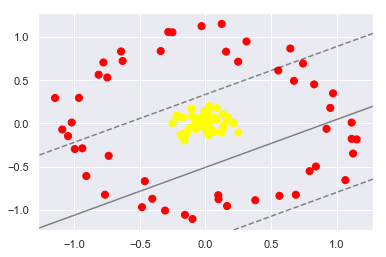

In [7]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=.1,noise=.1)
##先用线性
clf=SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

**三维空间**

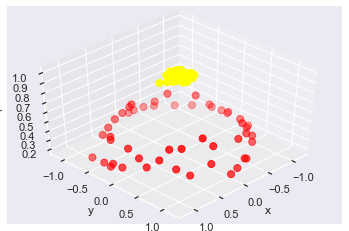

In [8]:
from mpl_toolkits import mplot3d
z = np.exp(-(X**2).sum(1))
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax=plt.subplot(projection='3d')
  
    ax.scatter3D(X[:,0],X[:,1],z,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
plot_3D(elev=45,azim=45,X=X,y=y)

In [9]:
clf=SVC(kernel='rbf')##高斯核函数
clf.fit(X,y)

D:\cainiao\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
clf.support_vectors_

array([[-0.73688854, -0.37351498],
       [ 0.55522783,  0.61180802],
       [-0.93755026, -0.28688194],
       [ 0.09809223, -0.82848087],
       [-0.46160106, -0.66628209],
       [ 0.24939288,  0.71387011],
       [-0.34055371,  0.83722716],
       [ 0.79384426, -0.55064375],
       [ 0.6748821 ,  0.4932322 ],
       [-0.63039707,  0.72237459],
       [ 0.15747966,  0.83061175],
       [-0.96326656,  0.29599378],
       [ 0.92265297, -0.06181705],
       [-0.7475574 ,  0.53182438],
       [ 0.09984999, -0.87452563],
       [-0.10535763,  0.17220183],
       [-0.1882574 , -0.1361496 ],
       [ 0.17145113,  0.07531667],
       [ 0.02856849,  0.20025876],
       [ 0.21443726,  0.00196241],
       [-0.21888176,  0.08982438],
       [-0.15851406, -0.19758437],
       [ 0.13269921,  0.10693894],
       [ 0.25071945, -0.10441424],
       [-0.24942368,  0.00401373],
       [ 0.08468791,  0.17728258],
       [ 0.20643744,  0.00987217],
       [-0.22065439,  0.07674073]])

### 参数选择


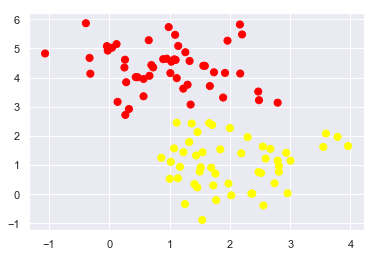

In [11]:
##松弛因子C越大分类可以容忍
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)##
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

In [12]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
        xlim=ax.get_xlim()
        ylim=ax.get_ylim()
        
        ##用SVM自带的decision_function函数来绘制
        x=np.linspace(xlim[0],xlim[1],30)
        y=np.linspace(ylim[0],xlim[1],30)
        Y,X=np.meshgrid(y,x)
        xy=np.vstack([X.ravel(),Y.ravel()]).T
        P=model.decision_function(xy).reshape(X.shape)
        
        ##绘制决策边界
        ax.contour(X,Y,P,colors='k',
                  levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
        ##支持向量
        if plot_support:
            ax.scatter(model.support_vectors_[:,0],
                      model.support_vectors_[:,1],
                      s=300,linewidth=1,facecolors='none')
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)

In [27]:
###绘制分割超平面
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # SVM的分割超平面
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    # 画出支持向量
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

D:\cainiao\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


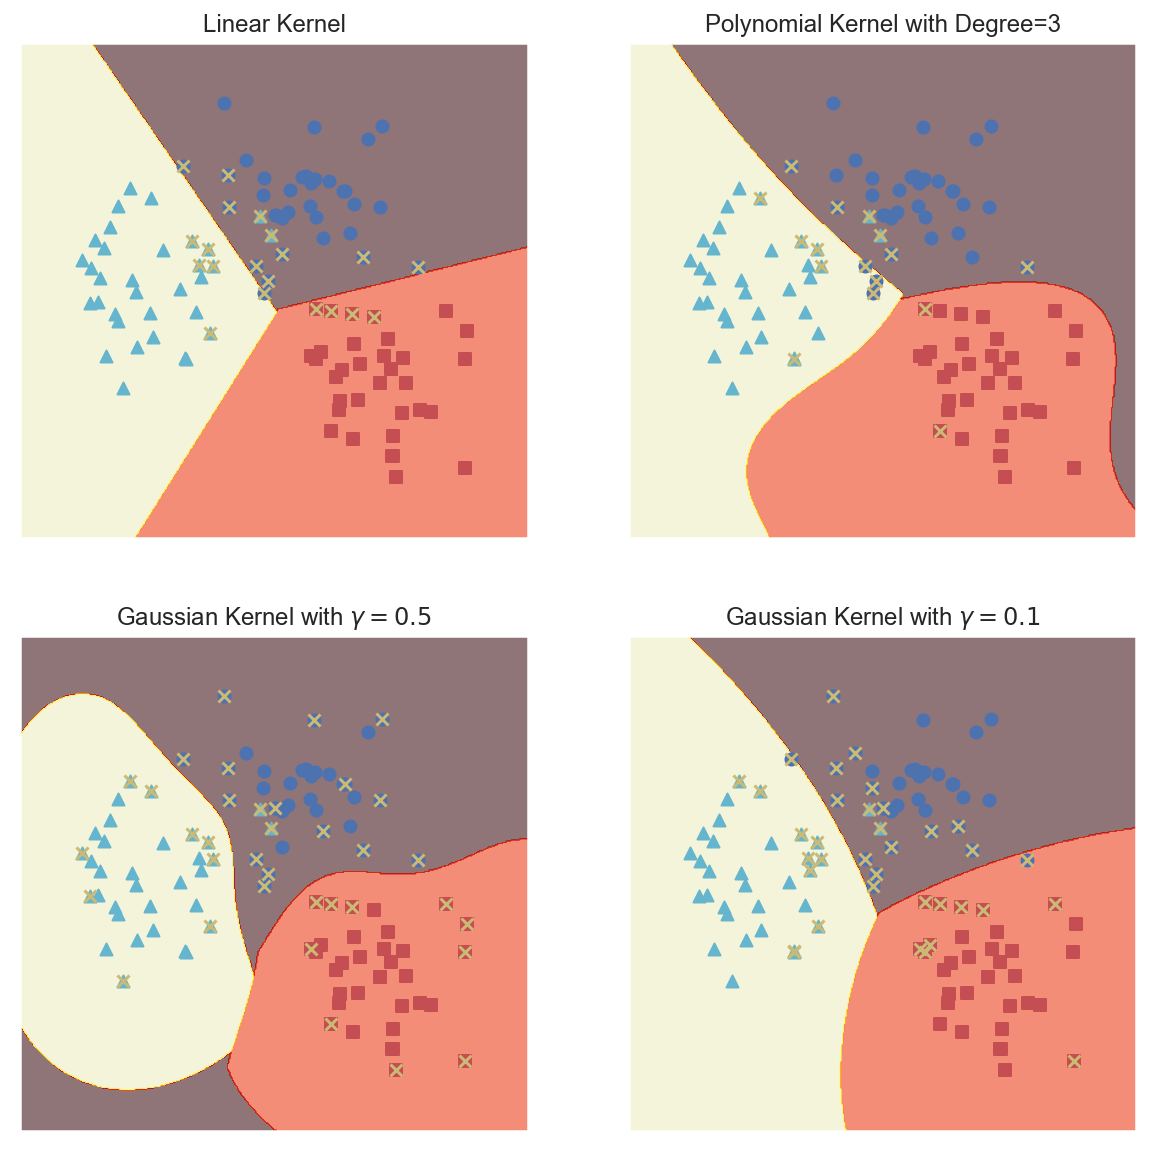

In [28]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, 
                  random_state=0, cluster_std=0.8)
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel', 
          'Polynomial Kernel with Degree=3', 
          'Gaussian Kernel with $\gamma=0.5$', 
          'Gaussian Kernel with $\gamma=0.1$']
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])

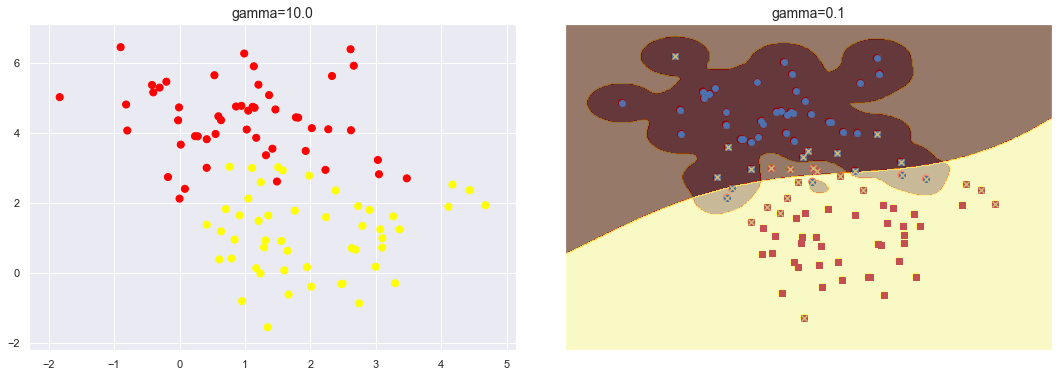

In [29]:
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.1)##
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

##选择不同的gamma值
for axi,gamma in zip(ax,[10.0,0.1]):
    model=SVC(kernel='rbf',gamma=gamma).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ##plot_svc_decision_function(model,axi,plot_support=False)
    plot_hyperplane(model,X,y)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1], s=300,lw=1,facecolors='none')
    axi.set_title('gamma={0:.1f}'.format(gamma),size=14)
    

## 人脸识别分类任务(数据读不出来)

In [ ]:
##读取数据
#from sklearn.datasets import fetch_lfw_people
#faces=fetch_lfw_people(min_faces_per_person=60)

##产看数据规模
#print(faces.target_names)
#print(faces.images.shape)